In [119]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from algorithms import *
import scipy
from tqdm import tqdm
import ot

# TV l2 denoising results

In [2]:
toy_gt = np.load('results/1d_ex/grad_subgrad/toy2d/metro/reg_par_1_data_par_4.0_tau_0.0016666666666666668_iter_50000.npy')
toy = np.load('results/1d_ex/grad_subgrad/toy2d/reg_par_1_data_par_4.0_tau_0.0016666666666666668_iter_50000.npy')
init = np.load('results/1d_ex/grad_subgrad/toy2d/reg_par_1_data_par_4.0_tau_0.0016666666666666668_iter_0.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'results/1d_ex/grad_subgrad/toy2d/metro/reg_par_1_data_par_4.0_tau_0.0016666666666666668_iter_50000.npy'

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[1].plot(toy_gt.mean(axis=-1))
ax[2].plot(toy.mean(axis=-1),'b')
ax[0].plot(init.mean(axis=-1),'b')


In [ ]:
n = toy_gt.shape[-1]
a, b = np.ones((n,)) / n, np.ones((n,)) / n
M = ot.dist(np.transpose(toy_gt), np.transpose(toy))
print(ot.emd2(a, b, M))

In [ ]:
step = 5000
num = 1//step

w2 = np.zeros([2,num])
for i in tqdm(range(num)):
    x = np.load('results/1d_ex/grad_subgrad/toy2d/reg_par_1_data_par_1.0_tau_0.00041666666666666664_iter_'+str(step*i)+'.npy')
    n = x.shape[-1]
    a, b = np.ones((n,)) / n, np.ones((n,)) / n
    M = ot.dist(np.transpose(x), np.transpose(toy_gt))
    w2[0,i] = ot.emd2(a, b, M)
    

In [ ]:
sigma = 1
d = 40
reg_par = 1
data_par = 1/(sigma**2)
eps=1e-1

m = data_par
L_F = data_par
L_G = reg_par*np.sqrt(d)
K_nrm = 2

tau = (eps*m)/(2*L_F*d + L_G**2*K_nrm**2)
print(tau)

In [ ]:
rates = np.zeros(num)
for i in tqdm(range(num)):
    rates[i] = np.power(1-m*tau,step*i)*w2[0,0]+(2*L_F*d + L_G**2*K_nrm**2)*tau/m

In [ ]:
plt.plot(np.log(w2[0,:]),'k')
plt.plot(np.log(rates))

In [ ]:
print(w2[0])

In [112]:
toy = np.load('results/1d_ex/grad_subgrad/toy2d/reg_par_1_data_par_0.25_tau_0.00016666666666666666_iter_40000.npy')
toy_gt = np.load('results/1d_ex/grad_subgrad/toy2d/metro/reg_par_1_data_par_0.25_tau_0.00016666666666666666_iter_100000.npy')


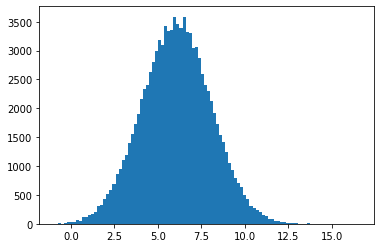

In [113]:
plt.hist(toy_gt.flatten(),bins=100);

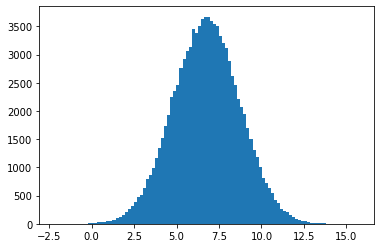

In [114]:
plt.hist(toy.flatten(),bins=100);

In [115]:
d=1
sigma=2
reg_par = 1
data_par = 1/(sigma**2)
eps = 1e-3
m = data_par
L_F = data_par
L_G = reg_par*np.sqrt(d)
K_nrm = 1

In [116]:
step = 500
num = 100000//step

w2 = np.zeros([num])
for i in tqdm(range(num)):
    x = np.load('results/1d_ex/grad_subgrad/toy2d/reg_par_1_data_par_0.25_tau_0.00016666666666666666_iter_'+str(step*i)+'.npy')
    w2[i] = ot.emd2_1d(x.flatten(), toy_gt.flatten())
    

100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 47.15it/s]


In [117]:

tau = (eps*m)/(2*L_F*d + L_G**2*K_nrm**2)
print(tau)

rates = np.zeros(num)
for i in tqdm(range(num)):
    rates[i] = np.power(1-m*tau,step*i)*w2[0]+(2*L_F*d + L_G**2*K_nrm**2)*tau/m

0.00016666666666666666


100%|█████████████████████████████████████| 200/200 [00:00<00:00, 153244.57it/s]


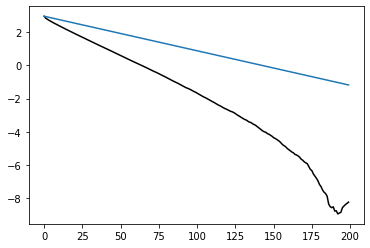

In [118]:
plt.plot(np.log(w2),'k')
plt.plot(np.log(rates))